In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats
import os

In [2]:
price_data = pd.read_csv("price_features.csv")
temp_price_data = pd.read_csv("temp_price_features.csv")

In [3]:
temp_price_data.head(10)

,Date,Hour,Zone,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,Time,GD Henry Hub,...,DirectMWh,IndirectMWh,TotalMWh,Type,LATITUDE,LONGITUDE,HDD,CDD,Season,Population
0,2016-02-05,21,CHIHUAHUA,632.40,745.34,-74.92,-38.02,55.76,21:00:00,2.045,...,NaN,NaN,437.740,Energy,28.633333,-106.083333,9.24,0.00,WINTER,1036806
1,2016-02-05,21,MONTERREY,566.03,745.34,-58.33,-120.99,59.00,21:00:00,2.045,...,NaN,NaN,1665.630,Energy,25.733333,-100.300000,6.00,0.00,WINTER,5341171
2,2016-02-05,21,VDM SUR,759.00,745.34,18.14,-4.49,73.94,21:00:00,2.045,...,NaN,NaN,2297.354,Energy,19.400000,-99.183333,0.00,8.94,WINTER,21804515
3,2016-02-06,3,CHIHUAHUA,519.41,598.45,-79.05,0.00,47.12,03:00:00,2.085,...,NaN,NaN,353.470,Energy,28.633333,-106.083333,17.88,0.00,WINTER,1036806
4,2016-02-06,3,MONTERREY,553.88,598.45,-44.58,0.00,57.56,03:00:00,2.085,...,NaN,NaN,1926.110,Energy,25.733333,-100.300000,7.44,0.00,WINTER,5341171
5,2016-02-06,3,VDM SUR,614.87,598.46,16.41,0.00,65.12,03:00:00,2.085,...,NaN,NaN,1469.397,Energy,19.400000,-99.183333,0.00,0.12,WINTER,21804515
6,2016-02-06,6,CHIHUAHUA,474.78,548.10,-73.32,0.00,35.24,06:00:00,2.085,...,NaN,NaN,349.930,Energy,28.633333,-106.083333,29.76,0.00,WINTER,1036806
7,2016-02-06,6,MONTERREY,504.68,548.10,-43.42,0.00,53.96,06:00:00,2.085,...,NaN,NaN,1892.090,Energy,25.733333,-100.300000,11.04,0.00,WINTER,5341171
8,2016-02-06,6,VDM SUR,562.87,548.10,14.77,0.00,57.56,06:00:00,2.085,...,NaN,NaN,1467.015,Energy,19.400000,-99.183333,7.44,0.00,WINTER,21804515
9,2016-02-06,9,CHIHUAHUA,585.44,669.34,-90.14,6.24,33.08,09:00:00,2.085,...,NaN,NaN,390.840,Energy,28.633333,-106.083333,31.92,0.00,WINTER,1036806


In [4]:
price_data.head(10)

,Date,Hour,Zone,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,DATETIME,Time,...,DirectMWh,IndirectMWh,TotalMWh,Type,LATITUDE,LONGITUDE,HDD,CDD,Season,Population
0,2016-02-05 00:00:00,20,MONTERREY,575.21,748.03,-62.02,-110.80,NaN,NaN,NaN,...,NaN,NaN,1667.390,Energy,25.733333,-100.300000,0.00,0.00,WINTER,5341171
1,2016-02-05 00:00:00,20,VDM SUR,765.12,748.03,21.20,-4.11,NaN,NaN,NaN,...,NaN,NaN,2299.714,Energy,19.400000,-99.183333,0.00,0.00,WINTER,21804515
2,2016-02-05 00:00:00,21,CHIHUAHUA,632.40,745.34,-74.92,-38.02,55.76,2016-02-05 21:00:00,21:00:00,...,NaN,NaN,437.740,Energy,28.633333,-106.083333,9.24,0.00,WINTER,1036806
3,2016-02-05 00:00:00,21,GUADALAJARA,789.74,745.34,31.91,12.48,NaN,NaN,NaN,...,NaN,NaN,1184.613,Energy,20.666667,-103.383333,0.00,0.00,WINTER,1385629
4,2016-02-05 00:00:00,21,MONTERREY,566.03,745.34,-58.33,-120.99,59.00,2016-02-05 21:00:00,21:00:00,...,NaN,NaN,1665.630,Energy,25.733333,-100.300000,6.00,0.00,WINTER,5341171
5,2016-02-05 00:00:00,21,VDM SUR,759.00,745.34,18.14,-4.49,73.94,2016-02-05 21:00:00,21:00:00,...,NaN,NaN,2297.354,Energy,19.400000,-99.183333,0.00,8.94,WINTER,21804515
6,2016-02-05 00:00:00,22,CHIHUAHUA,630.63,740.30,-67.07,-42.60,NaN,NaN,NaN,...,NaN,NaN,435.140,Energy,28.633333,-106.083333,0.00,0.00,WINTER,1036806
7,2016-02-05 00:00:00,22,GUADALAJARA,785.35,740.30,31.07,13.99,NaN,NaN,NaN,...,NaN,NaN,1136.742,Energy,20.666667,-103.383333,0.00,0.00,WINTER,1385629
8,2016-02-05 00:00:00,22,MONTERREY,546.64,740.30,-58.11,-135.55,NaN,NaN,NaN,...,NaN,NaN,1609.930,Energy,25.733333,-100.300000,0.00,0.00,WINTER,5341171
9,2016-02-05 00:00:00,22,VDM SUR,755.29,740.30,20.02,-5.03,NaN,NaN,NaN,...,NaN,NaN,2220.049,Energy,19.400000,-99.183333,0.00,0.00,WINTER,21804515


In [5]:
price_data = price_data.drop(['DirectMWh', 'IndirectMWh'], axis = 1)
temp_price_data = temp_price_data.drop(['DirectMWh', 'IndirectMWh'], axis = 1)

In [6]:
price_data['Date']= pd.to_datetime(price_data['Date'])
price_data['DATETIME']= pd.to_datetime(price_data['DATETIME'])
price_data.info()
price_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179227 entries, 0 to 179226
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                179227 non-null  datetime64[ns]
 1   Hour                179227 non-null  int64         
 2   Zone                179227 non-null  object        
 3   LMP                 179227 non-null  float64       
 4   Energy_LMP          179227 non-null  float64       
 5   Loss_LMP            179227 non-null  float64       
 6   Congestion_LMP      179227 non-null  float64       
 7   TMP                 37986 non-null   float64       
 8   DATETIME            37986 non-null   datetime64[ns]
 9   Time                37986 non-null   object        
 10  GD Henry Hub        179227 non-null  float64       
 11  GD Houston ShipChl  178267 non-null  float64       
 12  GD Waha             179227 non-null  float64       
 13  TotalMWh            177974 no

,Date,Hour,Zone,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,DATETIME,Time,...,GD Houston ShipChl,GD Waha,TotalMWh,Type,LATITUDE,LONGITUDE,HDD,CDD,Season,Population
0,2016-02-05,20,MONTERREY,575.21,748.03,-62.02,-110.80,NaN,NaT,NaN,...,1.99,1.94,1667.390,Energy,25.733333,-100.300000,0.00,0.0,WINTER,5341171
1,2016-02-05,20,VDM SUR,765.12,748.03,21.20,-4.11,NaN,NaT,NaN,...,1.99,1.94,2299.714,Energy,19.400000,-99.183333,0.00,0.0,WINTER,21804515
2,2016-02-05,21,CHIHUAHUA,632.40,745.34,-74.92,-38.02,55.76,2016-02-05 21:00:00,21:00:00,...,1.99,1.94,437.740,Energy,28.633333,-106.083333,9.24,0.0,WINTER,1036806
3,2016-02-05,21,GUADALAJARA,789.74,745.34,31.91,12.48,NaN,NaT,NaN,...,1.99,1.94,1184.613,Energy,20.666667,-103.383333,0.00,0.0,WINTER,1385629
4,2016-02-05,21,MONTERREY,566.03,745.34,-58.33,-120.99,59.00,2016-02-05 21:00:00,21:00:00,...,1.99,1.94,1665.630,Energy,25.733333,-100.300000,6.00,0.0,WINTER,5341171


In [7]:
price_data['Season'].value_counts()

WINTER    62111
SUMMER    58560
FALL      29296
SPRING    29260
Name: Season, dtype: int64

In [8]:
temp_price_data['Date']= pd.to_datetime(temp_price_data['Date'])
temp_price_data.info()
temp_price_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37986 entries, 0 to 37985
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                37986 non-null  datetime64[ns]
 1   Hour                37986 non-null  int64         
 2   Zone                37986 non-null  object        
 3   LMP                 37986 non-null  float64       
 4   Energy_LMP          37986 non-null  float64       
 5   Loss_LMP            37986 non-null  float64       
 6   Congestion_LMP      37986 non-null  float64       
 7   TMP                 37986 non-null  float64       
 8   Time                37986 non-null  object        
 9   GD Henry Hub        37986 non-null  float64       
 10  GD Houston ShipChl  37740 non-null  float64       
 11  GD Waha             37986 non-null  float64       
 12  TotalMWh            37840 non-null  float64       
 13  Type                37840 non-null  object    

,Date,Hour,Zone,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,Time,GD Henry Hub,GD Houston ShipChl,GD Waha,TotalMWh,Type,LATITUDE,LONGITUDE,HDD,CDD,Season,Population
0,2016-02-05,21,CHIHUAHUA,632.40,745.34,-74.92,-38.02,55.76,21:00:00,2.045,1.99,1.94,437.740,Energy,28.633333,-106.083333,9.24,0.00,WINTER,1036806
1,2016-02-05,21,MONTERREY,566.03,745.34,-58.33,-120.99,59.00,21:00:00,2.045,1.99,1.94,1665.630,Energy,25.733333,-100.300000,6.00,0.00,WINTER,5341171
2,2016-02-05,21,VDM SUR,759.00,745.34,18.14,-4.49,73.94,21:00:00,2.045,1.99,1.94,2297.354,Energy,19.400000,-99.183333,0.00,8.94,WINTER,21804515
3,2016-02-06,3,CHIHUAHUA,519.41,598.45,-79.05,0.00,47.12,03:00:00,2.085,2.02,1.94,353.470,Energy,28.633333,-106.083333,17.88,0.00,WINTER,1036806
4,2016-02-06,3,MONTERREY,553.88,598.45,-44.58,0.00,57.56,03:00:00,2.085,2.02,1.94,1926.110,Energy,25.733333,-100.300000,7.44,0.00,WINTER,5341171


In [9]:
temp_price_data['Hour'].value_counts()

15    6315
18    6187
12    5988
21    5954
3     5697
6     4084
9     3591
14      35
20      31
23      28
17      23
11      21
2       19
5        7
8        3
19       3
Name: Hour, dtype: int64

In [10]:
price_data['Hour'].value_counts()

1     7468
2     7468
23    7468
22    7468
21    7468
19    7468
18    7468
17    7468
16    7468
15    7468
14    7468
13    7468
12    7468
11    7468
10    7468
9     7468
8     7468
7     7468
6     7468
5     7468
4     7468
20    7467
3     7460
24    7456
25      16
Name: Hour, dtype: int64

Temperature data only has hours in 3 hour increments typically. I am going to start with the temp data set and move out if needed

### Turn my categorical variables using one hot encoding 

In [11]:
temp_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37986 entries, 0 to 37985
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                37986 non-null  datetime64[ns]
 1   Hour                37986 non-null  int64         
 2   Zone                37986 non-null  object        
 3   LMP                 37986 non-null  float64       
 4   Energy_LMP          37986 non-null  float64       
 5   Loss_LMP            37986 non-null  float64       
 6   Congestion_LMP      37986 non-null  float64       
 7   TMP                 37986 non-null  float64       
 8   Time                37986 non-null  object        
 9   GD Henry Hub        37986 non-null  float64       
 10  GD Houston ShipChl  37740 non-null  float64       
 11  GD Waha             37986 non-null  float64       
 12  TotalMWh            37840 non-null  float64       
 13  Type                37840 non-null  object    

In [12]:
temp_price_data['Type'].value_counts()

Energy    37840
Name: Type, dtype: int64

In [13]:
temp_price_data = temp_price_data.drop(['Type'], axis = 1)


In [14]:
price_data = price_data.drop(['Type'], axis = 1)

In [15]:
temp_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37986 entries, 0 to 37985
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                37986 non-null  datetime64[ns]
 1   Hour                37986 non-null  int64         
 2   Zone                37986 non-null  object        
 3   LMP                 37986 non-null  float64       
 4   Energy_LMP          37986 non-null  float64       
 5   Loss_LMP            37986 non-null  float64       
 6   Congestion_LMP      37986 non-null  float64       
 7   TMP                 37986 non-null  float64       
 8   Time                37986 non-null  object        
 9   GD Henry Hub        37986 non-null  float64       
 10  GD Houston ShipChl  37740 non-null  float64       
 11  GD Waha             37986 non-null  float64       
 12  TotalMWh            37840 non-null  float64       
 13  LATITUDE            37986 non-null  float64   

In [16]:
temp_price_data = temp_price_data.drop(['Time'], axis = 1)
price_data = price_data.drop(['Time'], axis = 1)

In [17]:
temp_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37986 entries, 0 to 37985
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                37986 non-null  datetime64[ns]
 1   Hour                37986 non-null  int64         
 2   Zone                37986 non-null  object        
 3   LMP                 37986 non-null  float64       
 4   Energy_LMP          37986 non-null  float64       
 5   Loss_LMP            37986 non-null  float64       
 6   Congestion_LMP      37986 non-null  float64       
 7   TMP                 37986 non-null  float64       
 8   GD Henry Hub        37986 non-null  float64       
 9   GD Houston ShipChl  37740 non-null  float64       
 10  GD Waha             37986 non-null  float64       
 11  TotalMWh            37840 non-null  float64       
 12  LATITUDE            37986 non-null  float64       
 13  LONGITUDE           37986 non-null  float64   

In [18]:
temp_price_data = pd.get_dummies(temp_price_data,columns = ['Zone'],drop_first=True, prefix='Z')

In [19]:
temp_price_data.head()

,Date,Hour,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,GD Henry Hub,GD Houston ShipChl,GD Waha,TotalMWh,LATITUDE,LONGITUDE,HDD,CDD,Season,Population,Z_GUADALAJARA,Z_MONTERREY,Z_VDM SUR
0,2016-02-05,21,632.40,745.34,-74.92,-38.02,55.76,2.045,1.99,1.94,437.740,28.633333,-106.083333,9.24,0.00,WINTER,1036806,0,0,0
1,2016-02-05,21,566.03,745.34,-58.33,-120.99,59.00,2.045,1.99,1.94,1665.630,25.733333,-100.300000,6.00,0.00,WINTER,5341171,0,1,0
2,2016-02-05,21,759.00,745.34,18.14,-4.49,73.94,2.045,1.99,1.94,2297.354,19.400000,-99.183333,0.00,8.94,WINTER,21804515,0,0,1
3,2016-02-06,3,519.41,598.45,-79.05,0.00,47.12,2.085,2.02,1.94,353.470,28.633333,-106.083333,17.88,0.00,WINTER,1036806,0,0,0
4,2016-02-06,3,553.88,598.45,-44.58,0.00,57.56,2.085,2.02,1.94,1926.110,25.733333,-100.300000,7.44,0.00,WINTER,5341171,0,1,0


In [20]:
temp_price_data = pd.get_dummies(temp_price_data,columns = ['Season'],drop_first=True, prefix='S')

In [21]:
temp_price_data.head()

,Date,Hour,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,GD Henry Hub,GD Houston ShipChl,GD Waha,...,LONGITUDE,HDD,CDD,Population,Z_GUADALAJARA,Z_MONTERREY,Z_VDM SUR,S_SPRING,S_SUMMER,S_WINTER
0,2016-02-05,21,632.40,745.34,-74.92,-38.02,55.76,2.045,1.99,1.94,...,-106.083333,9.24,0.00,1036806,0,0,0,0,0,1
1,2016-02-05,21,566.03,745.34,-58.33,-120.99,59.00,2.045,1.99,1.94,...,-100.300000,6.00,0.00,5341171,0,1,0,0,0,1
2,2016-02-05,21,759.00,745.34,18.14,-4.49,73.94,2.045,1.99,1.94,...,-99.183333,0.00,8.94,21804515,0,0,1,0,0,1
3,2016-02-06,3,519.41,598.45,-79.05,0.00,47.12,2.085,2.02,1.94,...,-106.083333,17.88,0.00,1036806,0,0,0,0,0,1
4,2016-02-06,3,553.88,598.45,-44.58,0.00,57.56,2.085,2.02,1.94,...,-100.300000,7.44,0.00,5341171,0,1,0,0,0,1


### Handle Remaining Null values 

In [22]:
temp_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37986 entries, 0 to 37985
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                37986 non-null  datetime64[ns]
 1   Hour                37986 non-null  int64         
 2   LMP                 37986 non-null  float64       
 3   Energy_LMP          37986 non-null  float64       
 4   Loss_LMP            37986 non-null  float64       
 5   Congestion_LMP      37986 non-null  float64       
 6   TMP                 37986 non-null  float64       
 7   GD Henry Hub        37986 non-null  float64       
 8   GD Houston ShipChl  37740 non-null  float64       
 9   GD Waha             37986 non-null  float64       
 10  TotalMWh            37840 non-null  float64       
 11  LATITUDE            37986 non-null  float64       
 12  LONGITUDE           37986 non-null  float64       
 13  HDD                 37986 non-null  float64   

In [23]:
temp_price_data = temp_price_data.dropna()

In [24]:
temp_price_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37594 entries, 0 to 37985
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                37594 non-null  datetime64[ns]
 1   Hour                37594 non-null  int64         
 2   LMP                 37594 non-null  float64       
 3   Energy_LMP          37594 non-null  float64       
 4   Loss_LMP            37594 non-null  float64       
 5   Congestion_LMP      37594 non-null  float64       
 6   TMP                 37594 non-null  float64       
 7   GD Henry Hub        37594 non-null  float64       
 8   GD Houston ShipChl  37594 non-null  float64       
 9   GD Waha             37594 non-null  float64       
 10  TotalMWh            37594 non-null  float64       
 11  LATITUDE            37594 non-null  float64       
 12  LONGITUDE           37594 non-null  float64       
 13  HDD                 37594 non-null  float64   

### Extract Year, Month, Day from Date 

In [31]:
temp_price_data['Year'] = pd.DatetimeIndex(temp_price_data['Date']).year
temp_price_data['Month'] = pd.DatetimeIndex(temp_price_data['Date']).month
temp_price_data['Day'] = pd.DatetimeIndex(temp_price_data['Date']).day

In [32]:
temp_price_data.head()

,Date,Hour,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,GD Henry Hub,GD Houston ShipChl,GD Waha,...,Population,Z_GUADALAJARA,Z_MONTERREY,Z_VDM SUR,S_SPRING,S_SUMMER,S_WINTER,Year,Month,Day
0,2016-02-05,21,632.40,745.34,-74.92,-38.02,55.76,2.045,1.99,1.94,...,1036806,0,0,0,0,0,1,2016,2,5
1,2016-02-05,21,566.03,745.34,-58.33,-120.99,59.00,2.045,1.99,1.94,...,5341171,0,1,0,0,0,1,2016,2,5
2,2016-02-05,21,759.00,745.34,18.14,-4.49,73.94,2.045,1.99,1.94,...,21804515,0,0,1,0,0,1,2016,2,5
3,2016-02-06,3,519.41,598.45,-79.05,0.00,47.12,2.085,2.02,1.94,...,1036806,0,0,0,0,0,1,2016,2,6
4,2016-02-06,3,553.88,598.45,-44.58,0.00,57.56,2.085,2.02,1.94,...,5341171,0,1,0,0,0,1,2016,2,6


In [33]:
temp_price_nodate = temp_price_data.drop(['Date'], axis = 1)

In [35]:
temp_price_nodate.head()

,Hour,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,GD Henry Hub,GD Houston ShipChl,GD Waha,TotalMWh,...,Population,Z_GUADALAJARA,Z_MONTERREY,Z_VDM SUR,S_SPRING,S_SUMMER,S_WINTER,Year,Month,Day
0,21,632.40,745.34,-74.92,-38.02,55.76,2.045,1.99,1.94,437.740,...,1036806,0,0,0,0,0,1,2016,2,5
1,21,566.03,745.34,-58.33,-120.99,59.00,2.045,1.99,1.94,1665.630,...,5341171,0,1,0,0,0,1,2016,2,5
2,21,759.00,745.34,18.14,-4.49,73.94,2.045,1.99,1.94,2297.354,...,21804515,0,0,1,0,0,1,2016,2,5
3,3,519.41,598.45,-79.05,0.00,47.12,2.085,2.02,1.94,353.470,...,1036806,0,0,0,0,0,1,2016,2,6
4,3,553.88,598.45,-44.58,0.00,57.56,2.085,2.02,1.94,1926.110,...,5341171,0,1,0,0,0,1,2016,2,6


In [36]:
temp_price_nodate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37594 entries, 0 to 37985
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hour                37594 non-null  int64  
 1   LMP                 37594 non-null  float64
 2   Energy_LMP          37594 non-null  float64
 3   Loss_LMP            37594 non-null  float64
 4   Congestion_LMP      37594 non-null  float64
 5   TMP                 37594 non-null  float64
 6   GD Henry Hub        37594 non-null  float64
 7   GD Houston ShipChl  37594 non-null  float64
 8   GD Waha             37594 non-null  float64
 9   TotalMWh            37594 non-null  float64
 10  LATITUDE            37594 non-null  float64
 11  LONGITUDE           37594 non-null  float64
 12  HDD                 37594 non-null  float64
 13  CDD                 37594 non-null  float64
 14  Population          37594 non-null  int64  
 15  Z_GUADALAJARA       37594 non-null  uint8  
 16  Z_MO

In [42]:
temp_price_nodate = temp_price_nodate.drop(['Energy_LMP', 'Loss_LMP', 'Congestion_LMP'], axis = 1)


### Random Forest Feature Importance 

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(temp_price_nodate.drop(columns='LMP'), 
                                                    temp_price_nodate.LMP, test_size=0.3, 
                                                    random_state=42)

In [96]:
## Import the random forest model.
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor() 
rf.fit(X_train, y_train) 
rf.score(X_test, y_test)

0.8210286206149986

In [97]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [98]:
feature_importances

,importance
GD Henry Hub,0.206769
TotalMWh,0.171287
GD Waha,0.103980
Day,0.103758
GD Houston ShipChl,0.094136
Month,0.076772
Hour,0.071505
Year,0.038601
TMP,0.027569
CDD,0.025016


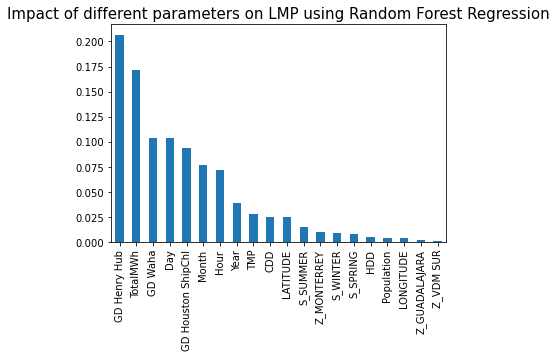

In [99]:
feature_importances.plot(kind='bar',rot=10,legend=False)
plt.title('Impact of different parameters on LMP using Random Forest Regression',fontsize=15)
plt.xticks(rotation = 90) 
plt.show()

### Normalize Features 

In [100]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)



In [101]:
## Import the random forest model.
rf2 = RandomForestRegressor() 
rf2.fit(X_tr_scaled, y_train) 
rf2.score(X_te_scaled, y_test)

feature_importances_scaled = pd.DataFrame(rf2.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances_scaled

,importance
GD Henry Hub,0.207683
TotalMWh,0.176054
Day,0.102976
GD Waha,0.099749
GD Houston ShipChl,0.094887
Month,0.074836
Hour,0.069867
Year,0.039001
TMP,0.030025
CDD,0.023849


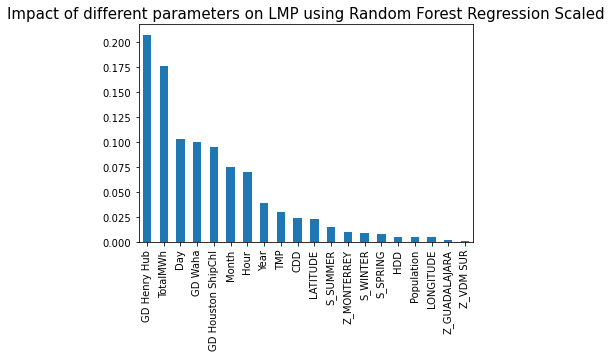

In [102]:
feature_importances_scaled.plot(kind='bar',rot=10,legend=False)
plt.title('Impact of different parameters on LMP using Random Forest Regression Scaled',fontsize=15)
plt.xticks(rotation = 90) 
plt.show()

 #### Correlation Matrix 

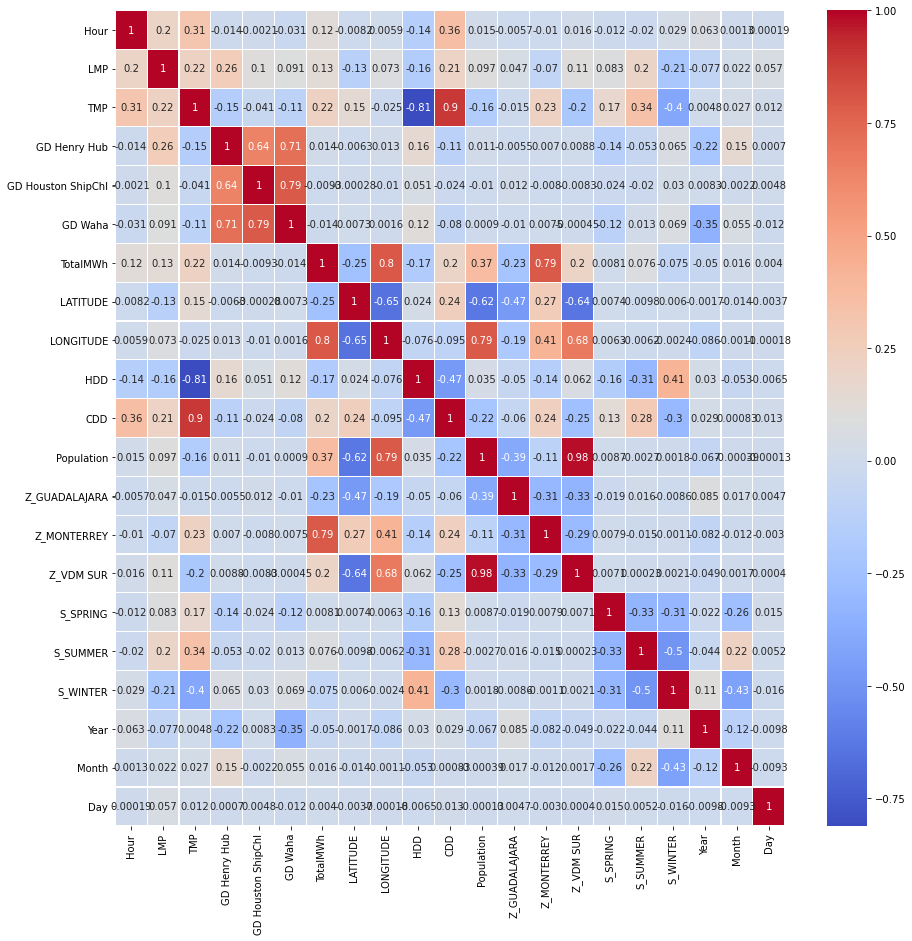

In [103]:
plt.figure(figsize=(15,15))
sns.heatmap(temp_price_nodate.corr(),linewidths=.1,cmap="coolwarm", annot=True)
plt.yticks(rotation=0);

The only collinear varibles I see from correlation matrix is population and city.

### Variance Inflation Factor with Standardized data

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#vif = [variance_inflation_factor(X_tr_scaled, i) for i in range(X_tr_scaled.shape[1])]
#print(vif)

Z = add_constant(X_tr_scaled)
Col = list(X_train.columns)
Col.append("Constant")

VIF = pd.Series([variance_inflation_factor(Z, i) 
               for i in range(Z.shape[1])], 
              index=Col)
VIF

Hour                   0.000000
TMP                    1.378692
GD Henry Hub                inf
GD Houston ShipChl     2.020522
GD Waha                2.864454
TotalMWh               3.804639
LATITUDE              13.208016
LONGITUDE                   inf
HDD                         inf
CDD                         inf
Population                  inf
Z_GUADALAJARA               inf
Z_MONTERREY                 inf
Z_VDM SUR                   inf
S_SPRING                    inf
S_SUMMER               2.530982
S_WINTER               2.569592
Year                   3.476613
Month                  1.665290
Day                    1.871662
Constant               1.002278
dtype: float64

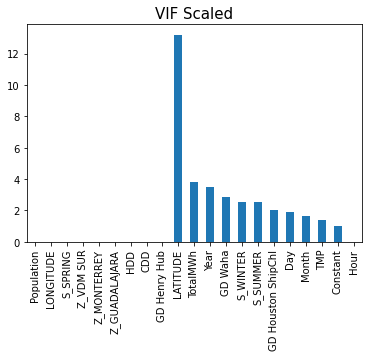

In [107]:
VIF.sort_values(ascending=False).plot(kind='bar',rot=10,legend=False)
plt.title('VIF Scaled',fontsize=15)
plt.xticks(rotation = 90) 
plt.show()

### Variance Inflation Factor with Non Standardized data

In [108]:
D = add_constant(X_train)

VIF_nonscaled = pd.Series([variance_inflation_factor(D.values, i) 
               for i in range(D.shape[1])], 
              index=Col)
VIF_nonscaled

Hour                   0.000000
TMP                    1.378692
GD Henry Hub                inf
GD Houston ShipChl     2.020522
GD Waha                2.864454
TotalMWh               3.804639
LATITUDE              13.208016
LONGITUDE                   inf
HDD                         inf
CDD                         inf
Population                  inf
Z_GUADALAJARA               inf
Z_MONTERREY                 inf
Z_VDM SUR                   inf
S_SPRING                    inf
S_SUMMER               2.530982
S_WINTER               2.569592
Year                   3.476613
Month                  1.665290
Day                    1.871662
Constant               1.002278
dtype: float64

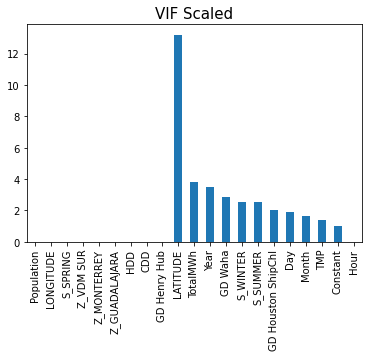

In [109]:
VIF_nonscaled.sort_values(ascending=False).plot(kind='bar',rot=10,legend=False)
plt.title('VIF Scaled',fontsize=15)
plt.xticks(rotation = 90) 
plt.show()